<a href="https://colab.research.google.com/github/SakshiSodmise/Projects/blob/main/Image_Classification_Model_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras


Step 2: Load Data


4422102/4422102 [==============================] - 1s 0us/step


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

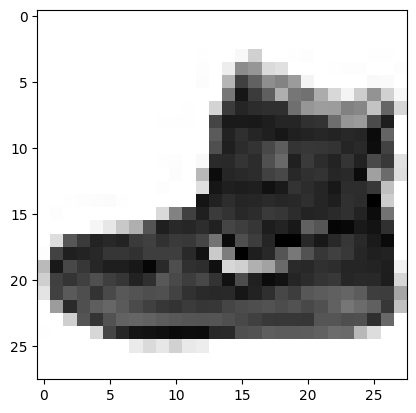

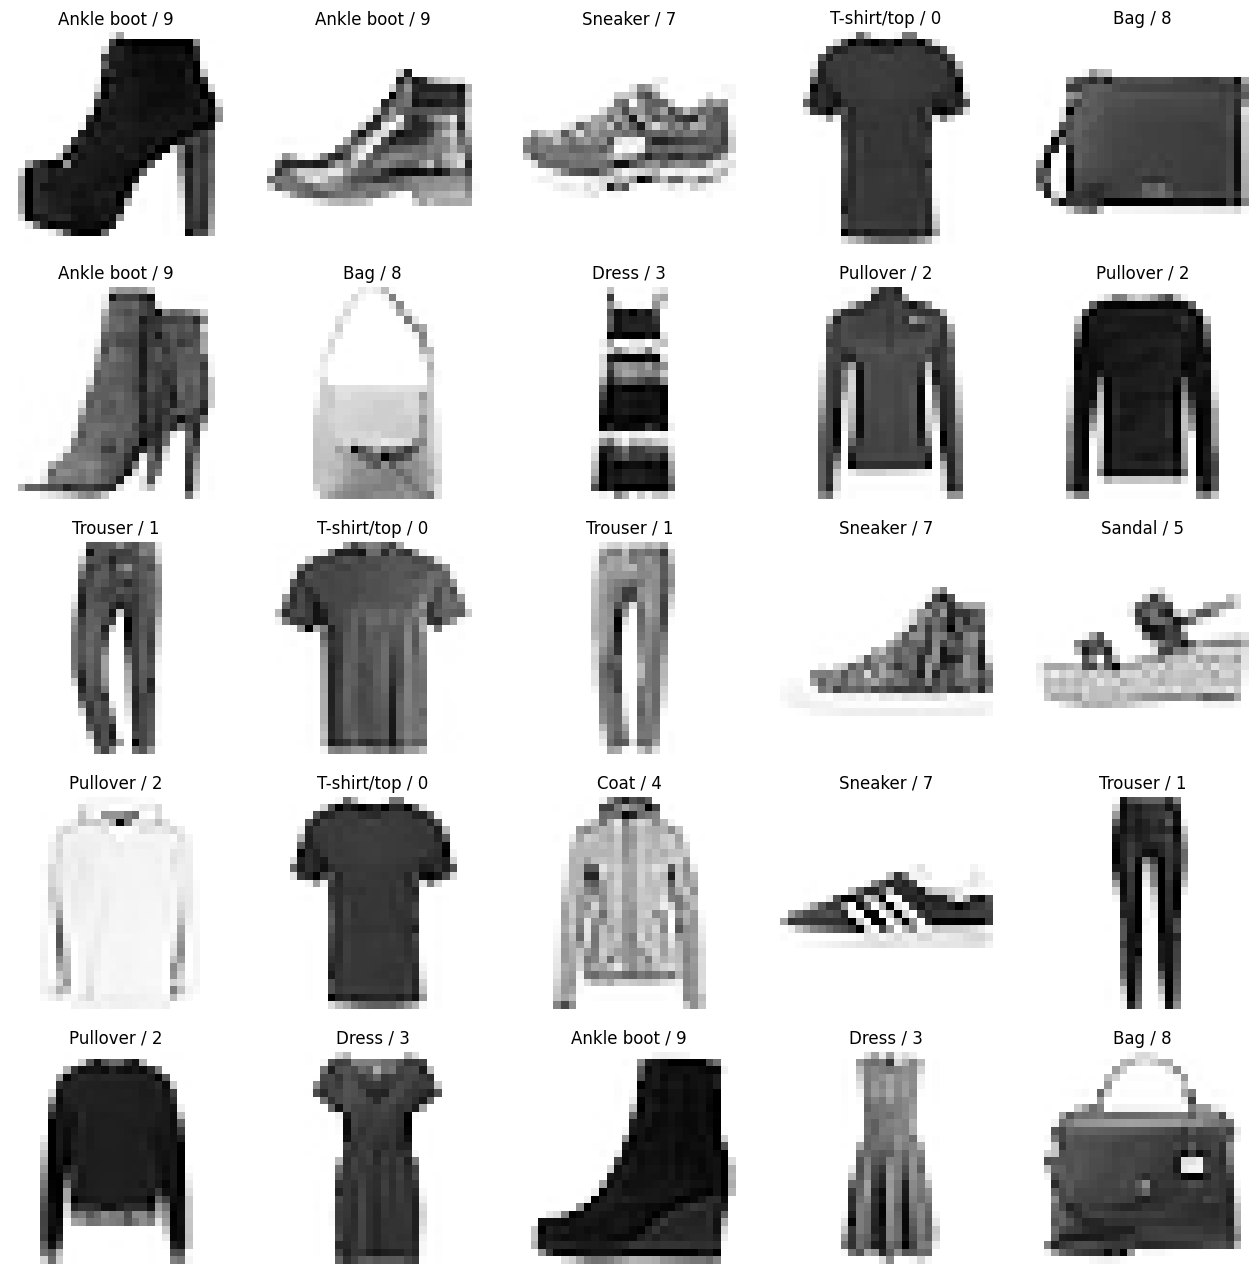

In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

# Print the shape of data

X_train.shape,y_train.shape, "****************", X_test.shape,y_test.shape

X_train[0]

y_train[0]

class_labels = [	"T-shirt/top","Trouser",	"Pullover","Dress","Coat", "Sandal", "Shirt",	"Sneaker", "Bag","Ankle boot"]

class_labels

# show image

plt.imshow(X_train[0], cmap='Greys')

plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}' .format(class_labels[y_train[i]],y_train[i]))

X_train.ndim

X_train = np.expand_dims(X_train,-1)

X_train.ndim

x_test=np.expand_dims(X_test,-1)

# feature scaling

X_train = X_train/255
X_test= X_test/255

# Split dataset

from sklearn.model_selection import train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

Step 3 : Building CNN Model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

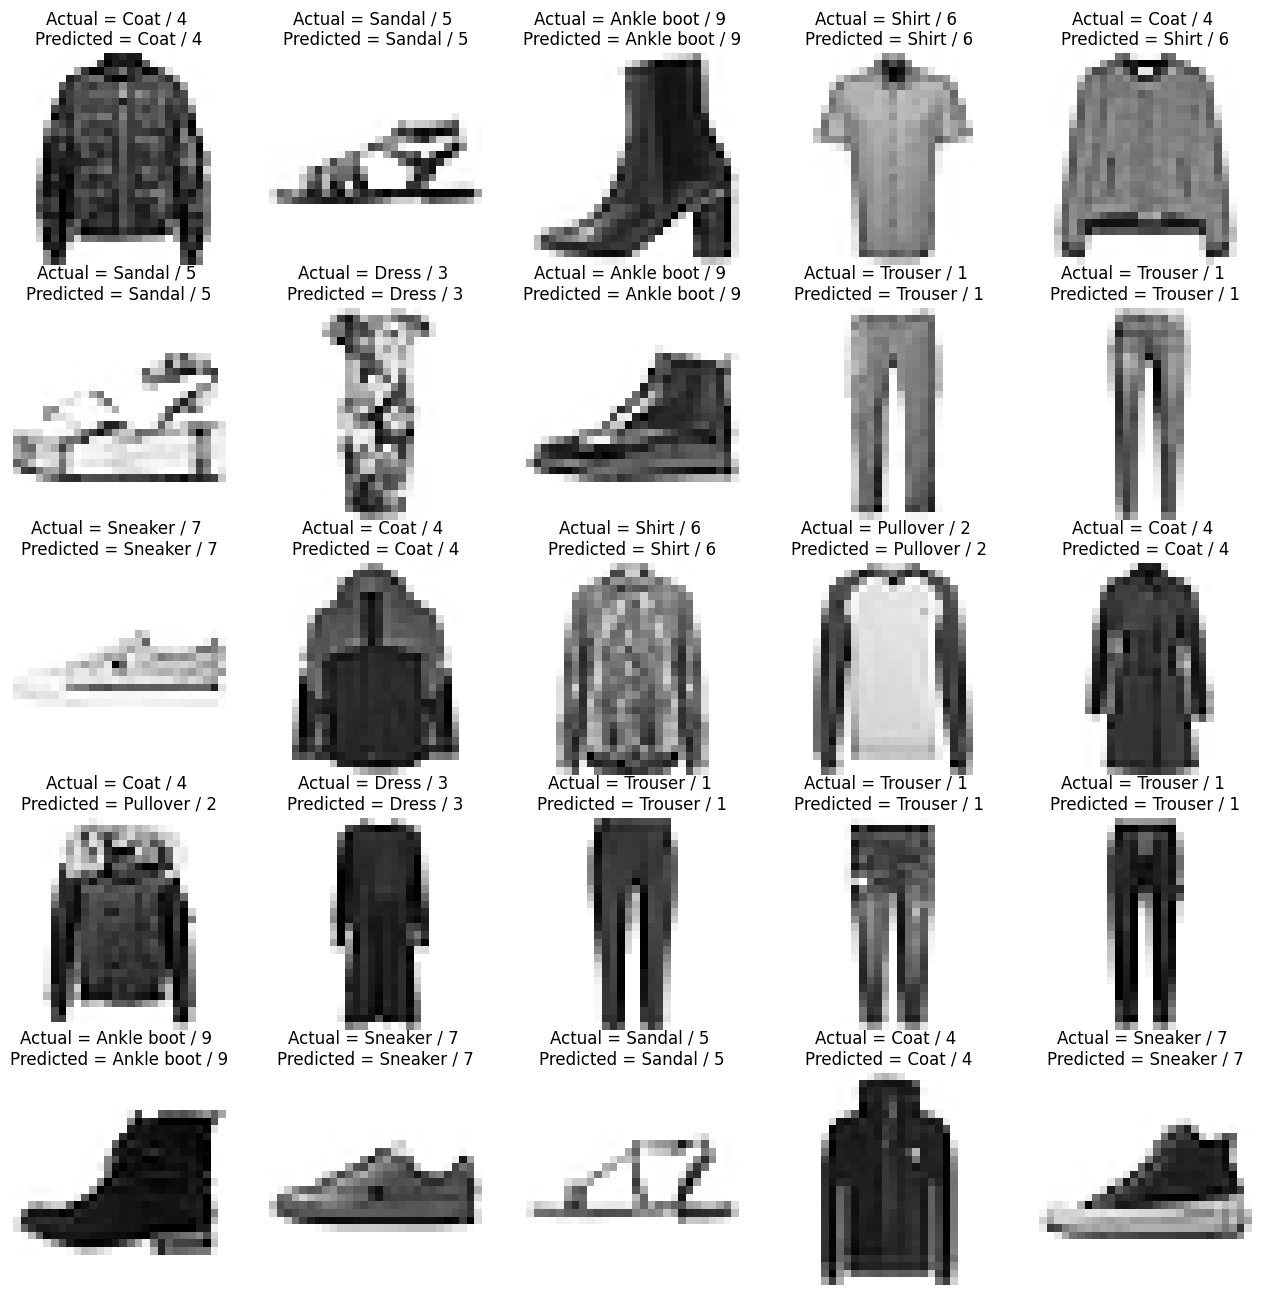

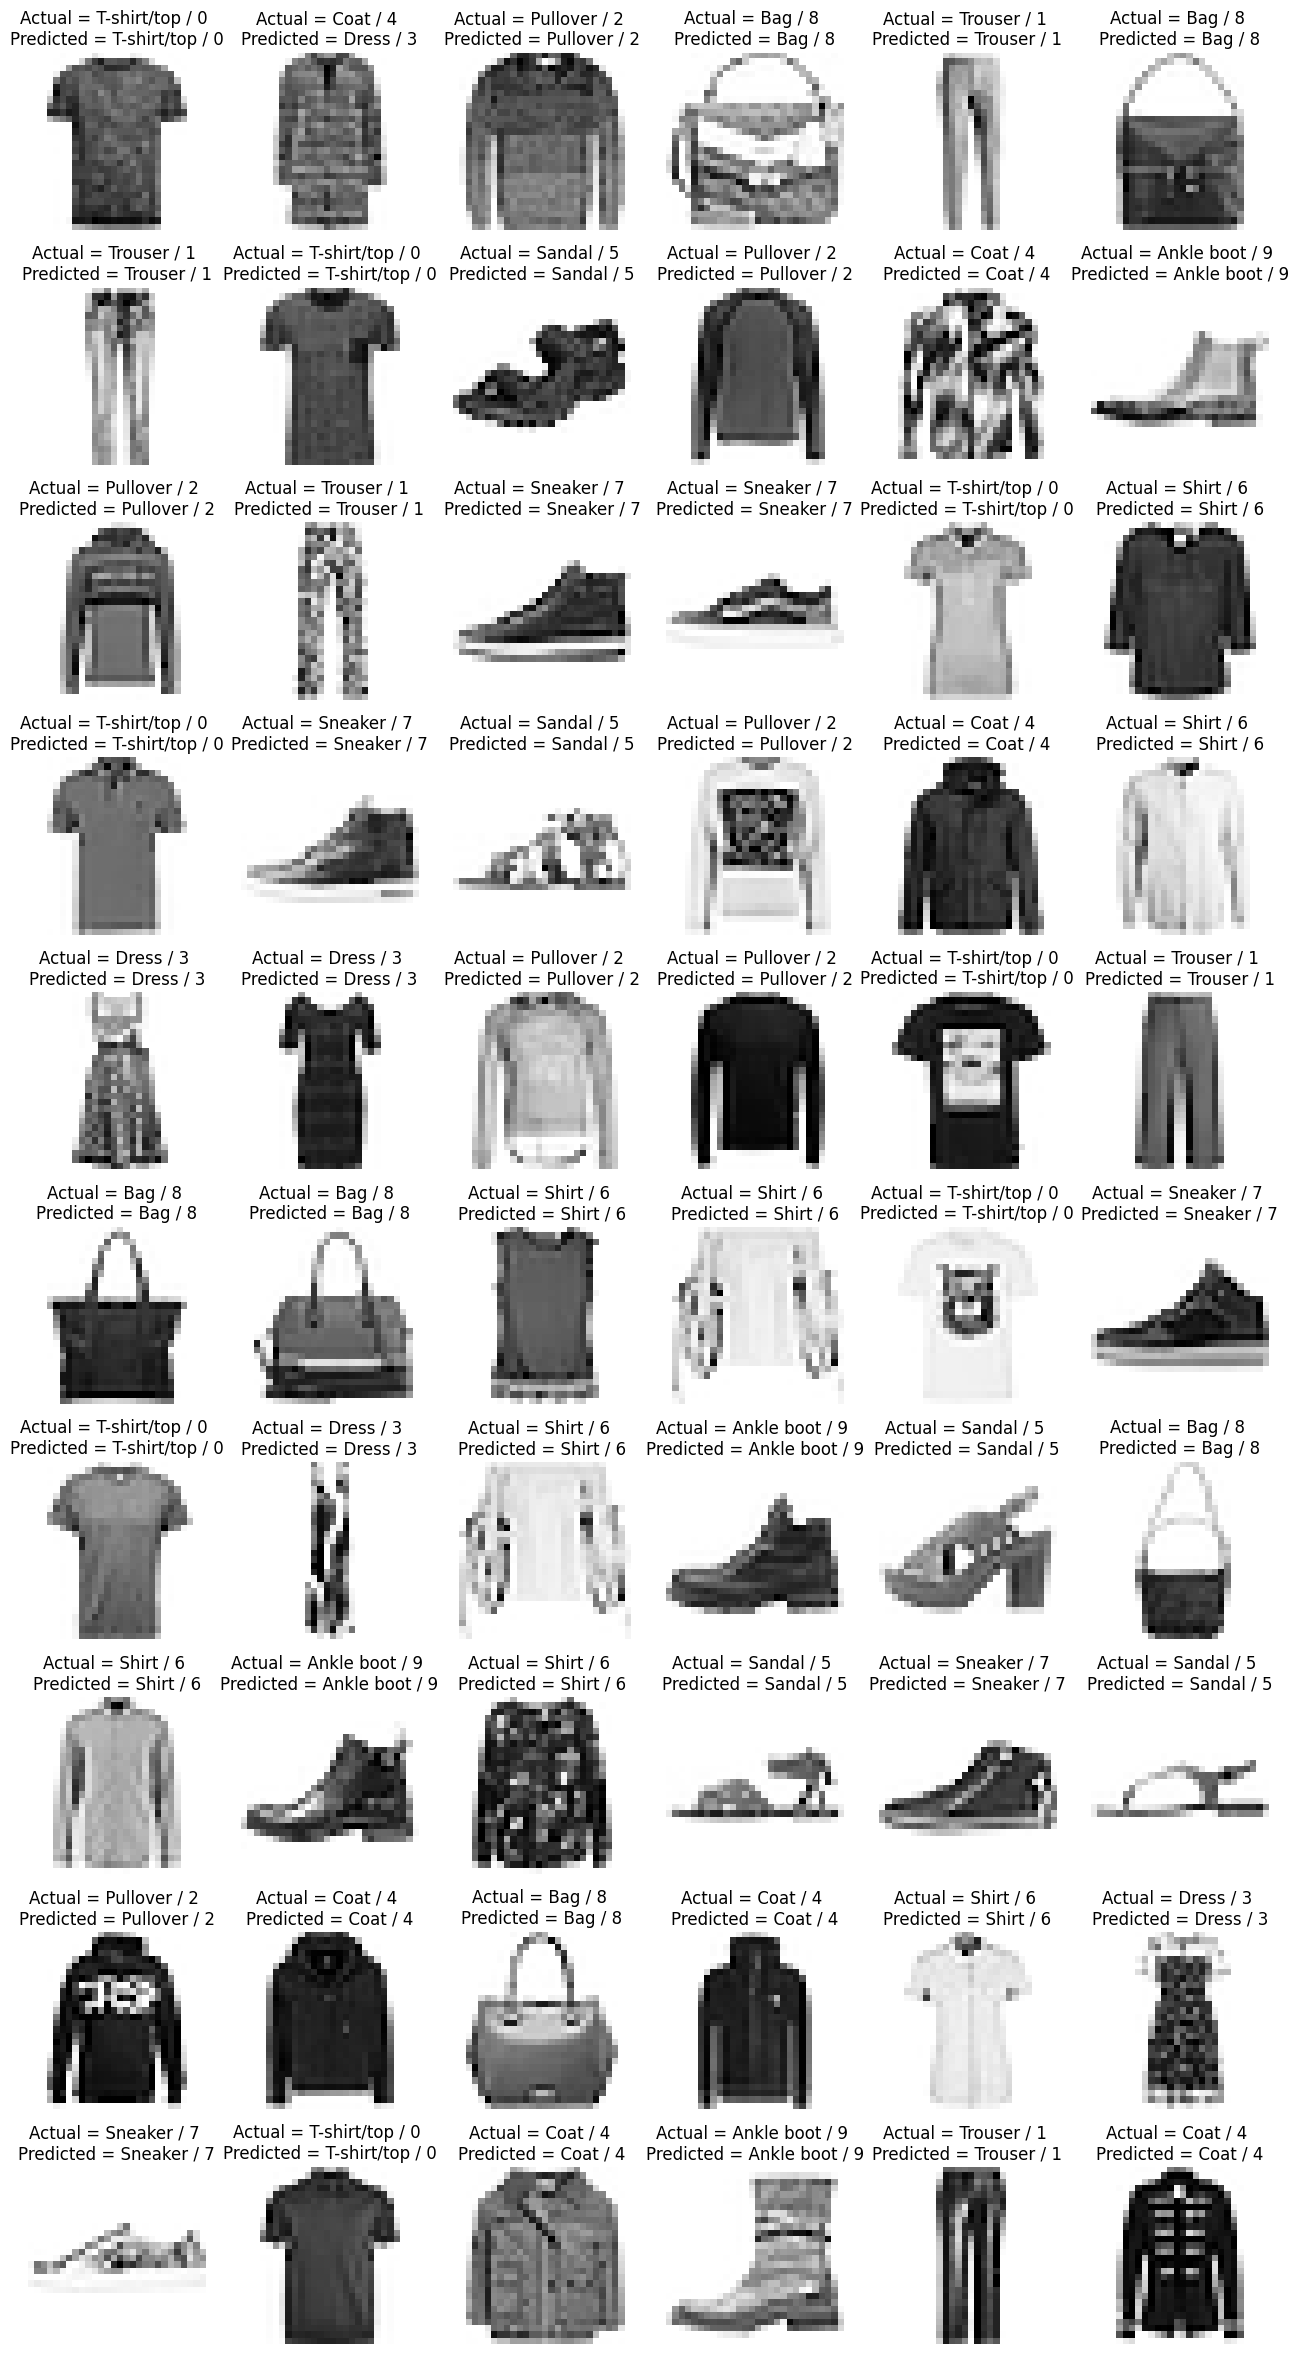

In [ ]:
model = keras.models.Sequential([
                          keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=128,activation='relu'),
                          keras.layers.Dense(units=10,activation='softmax')
])

model.summary()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

y_pred = model.predict(X_test)
y_pred.round(2)

y_test

model.evaluate(x_test,y_test)

plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')




Step 4 : Confusion Matrix

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.86      0.84      1000
           3       0.92      0.88      0.90      1000
           4       0.85      0.80      0.82      1000
           5       0.99      0.96      0.97      1000
           6       0.72      0.70      0.71      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



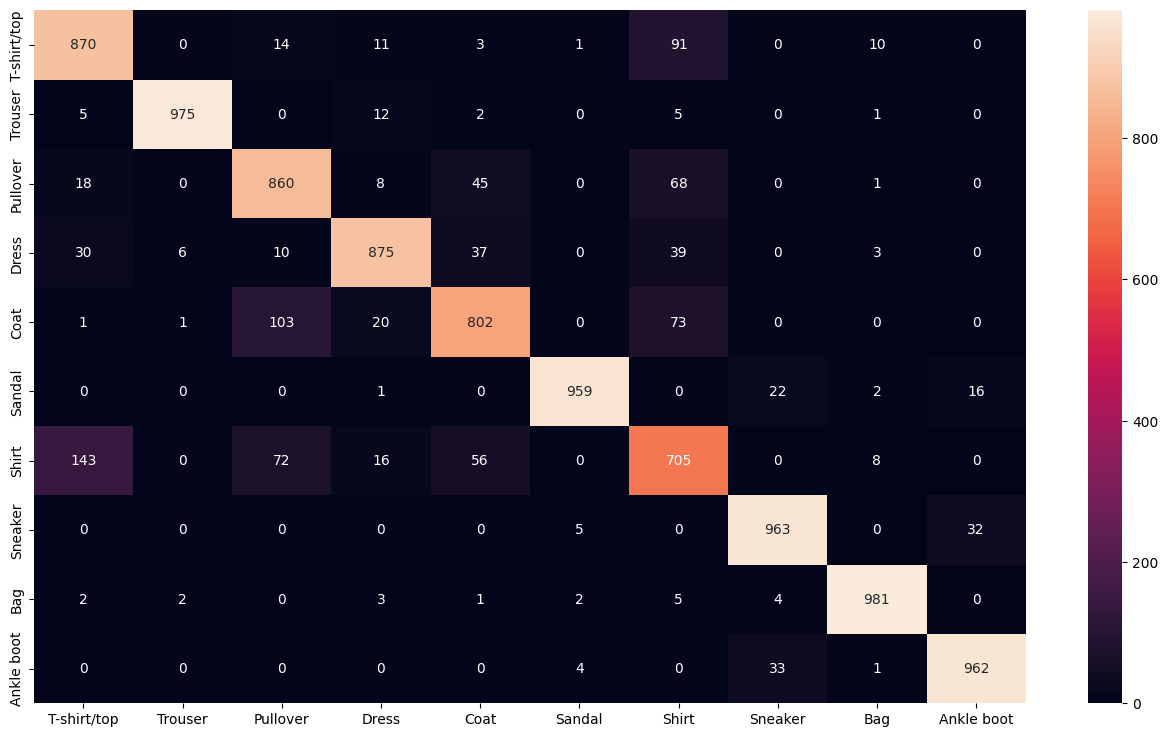

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred_labels)
print(cr)

Step 5 : Save Model

In [ ]:
model.save('fashion_mnist_cnn_models.h5')

cnn_model12 = keras.models.Sequential([

                           keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1), padding='valid', activation= 'relu', input_shape=[28,28,1]),
                           keras.layers.MaxPooling2D(pool_size=(2,2)),
                           keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                           keras.layers.MaxPooling2D(pool_size=(2,2)),
                           keras.layers.Flatten(),
                           keras.layers.Dense(units=128,activation='relu'),
                           keras.layers.Dropout(0.25),
                           keras.layers.Dense(units=256,activation='relu'),
                           keras.layers.Dropout(0.25),
                           keras.layers.Dense(units=128, activation='relu'),
                           keras.layers.Dense(units=10, activation='softmax')
                           ])
cnn_model12.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn_model12.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model12.save('fashion_mnist_cnn_model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/20
94/94 [==============================] - 29s 296ms/step - loss: 1.0467 - accuracy: 0.6064 - val_loss: 0.5845 - val_accuracy: 0.7776
Epoch 2/20
94/94 [==============================] - 27s 291ms/step - loss: 0.5590 - accuracy: 0.7912 - val_loss: 0.4613 - val_accuracy: 0.8309
Epoch 3/20
94/94 [==============================] - 30s 315ms/step - loss: 0.4674 - accuracy: 0.8283 - val_loss: 0.4140 - val_accuracy: 0.8480
Epoch 4/20
94/94 [==============================] - 28s 301ms/step - loss: 0.4146 - accuracy: 0.8476 - val_loss: 0.3921 - val_accuracy: 0.8570
Epoch 5/20
94/94 [==============================] - 27s 292ms/step - loss: 0.3748 - accuracy: 0.8620 - val_loss: 0.3431 - val_accuracy: 0.8704
Epoch 6/20
94/94 [==============================] - 27s 290ms/step - loss: 0.3532 - accuracy: 0.8715 - val_loss: 0.3501 - val_accuracy: 0.8703
Epoch 7/20
94/94 [==============================] - 27s 285ms/step - loss: 0.3259 - accuracy: 0.8823 - val_loss: 0.3110 - val_accuracy: 0.8850

Step 6 : Complex Model

In [ ]:
cnn_model13 = keras.models.Sequential([

                           keras.layers.Conv2D(filters=64, kernel_size=3 ,strides=(1,1), padding='valid', activation= 'relu', input_shape=[28,28,1]),
                           keras.layers.MaxPooling2D(pool_size=(2,2)),
                           keras.layers.Conv2D(filters=128,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                           keras.layers.MaxPooling2D(pool_size=(2,2)),
                           keras.layers.Conv2D(filters=64, kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                           keras.layers.MaxPooling2D(pool_size=(2,2)),
                           keras.layers.Flatten(),
                           keras.layers.Dense(units=128,activation='relu'),
                           keras.layers.Dropout(0.25),
                           keras.layers.Dense(units=256,activation='relu'),
                           keras.layers.Dropout(0.5),
                           keras.layers.Dense(units=256, activation='relu'),
                           keras.layers.Dropout(0.25),
                           keras.layers.Dense(units=126, activation='relu'),
                           keras.layers.Dropout(0.10),
                           keras.layers.Dense(units=10, activation='softmax')
                           ])
cnn_model13.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn_model13.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model13.save('fashion_mnist_cnn_model3.h5')
cnn_model13.evaluate(x_test, y_test)

Epoch 1/20
94/94 [==============================] - 65s 678ms/step - loss: 1.1593 - accuracy: 0.5443 - val_loss: 0.5968 - val_accuracy: 0.7653
Epoch 2/20
94/94 [==============================] - 63s 674ms/step - loss: 0.5859 - accuracy: 0.7789 - val_loss: 0.4931 - val_accuracy: 0.8047
Epoch 3/20
94/94 [==============================] - 63s 664ms/step - loss: 0.4876 - accuracy: 0.8171 - val_loss: 0.4282 - val_accuracy: 0.8366
Epoch 4/20
94/94 [==============================] - 63s 670ms/step - loss: 0.4315 - accuracy: 0.8390 - val_loss: 0.3818 - val_accuracy: 0.8568
Epoch 5/20
94/94 [==============================] - 64s 676ms/step - loss: 0.3749 - accuracy: 0.8656 - val_loss: 0.3545 - val_accuracy: 0.8720
Epoch 6/20
94/94 [==============================] - 66s 702ms/step - loss: 0.3386 - accuracy: 0.8778 - val_loss: 0.3312 - val_accuracy: 0.8756
Epoch 7/20
94/94 [==============================] - 64s 684ms/step - loss: 0.3150 - accuracy: 0.8885 - val_loss: 0.3190 - val_accuracy: 0.8863